In [1]:
%matplotlib inline
''' Python Tools '''
import numpy as np
np.set_printoptions(suppress=True) # Changes print functionality
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

'''PyTorch Functionality'''
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils

'''Landscape Class'''
from Protein_Landscape.landscape_class import Protein_Landscape
from Protein_Landscape.protein import Protein

'''Dataset Management'''
Datasets = 'Data/'
#Datasets = "~/PhD/Protein_Evolution/Datasets/GProtein/"

In [2]:
test = Protein_Landscape(csv_path=Datasets+"Small_NK.csv",gen_graph=True)


Building Protein Graph for entire dataset


100%|██████████| 1000/1000 [00:00<00:00, 6554.74it/s]


        Protein Landscape class
            Number of Sequences : 1000
            Max Distance        : 3
            Number of Distances : 3
            Seed Sequence       : AAA
                Modified positions are shown in green
        


In [3]:
big = Protein_Landscape(csv_path=Datasets+"NK/K0/V0.csv",gen_graph=True)

Building Protein Graph for entire dataset


100%|██████████| 100000/100000 [00:23<00:00, 4346.97it/s]



        Protein Landscape class
            Number of Sequences : 100000
            Max Distance        : 5
            Number of Distances : 5
            Seed Sequence       : AAAAA
                Modified positions are shown in green
        


In [4]:
test.graph_to_networkx(labels=["fitness","tokenized"])

100%|██████████| 1000/1000 [00:00<00:00, 23214.63it/s]


In [10]:
test.generate_mutations("ACA")

test.tokenized[:,:-1]

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 2],
       ...,
       [9, 9, 7],
       [9, 9, 8],
       [9, 9, 9]], dtype=object)

In [20]:
test.tokenized[:,:-1] == np.array([[0,0,0],[0,0,1]])

<ipython-input-20-a0a74a923368>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  test.tokenized[:,:-1] == np.array([[0,0,0],[0,0,1]])


False

In [28]:
class mydict(dict):
    def __init__(self,kwargs):
        self.kwargs = kwargs
    
mydict({"A" : 1})

{}

In [18]:
import numpy as np

def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

levenshtein("ACA","LDL")

[[0. 1. 2. 3.]
 [1. 1. 2. 3.]
 [2. 2. 2. 3.]
 [3. 3. 3. 3.]]


3.0

In [5]:
def shotgun_data(landscape,num_samples=100):
    """
    Shotgun data randomly samples the entirety of the dataset

    Parameters
    ----------
    num_samples : int, default=1000

        Determines how many datapoints will be sampled
    """
    idxs = np.random.choice(len(landscape), size=(num_samples,))
    return idxs



In [6]:
def sequences(Protein_Landscape):
    Protein_Landscape.context = "sequences"
    return Protein_Landscape 

def graph(f):
    print(dir(f))
    proland.context = "graph"
    return proland

test.context = "sequences"

@graph
def iters(Protein_Landscape):
    for node in Protein_Landscape:
        print(node)


#iter_graph(test)

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


NameError: name 'proland' is not defined

In [10]:
cProfile.run("big.calc_neighbours(5)",sort="cumtime")


         74 function calls in 0.001 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 landscape_class.py:651(calc_neighbours)
        1    0.000    0.000    0.000    0.000 landscape_class.py:625(generate_mutations)
        1    0.000    0.000    0.000    0.000 landscape_class.py:683(<listcomp>)
        2    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(sort)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(all)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:839(sort)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:2337(all)
        1    0.000   

In [3]:
import cProfile, pstats, io
from pstats import SortKey

pr = cProfile.Profile()
pr.enable()
big = Protein_Landscape(csv_path=Datasets+"NK/K0/V0.csv",gen_graph=True)
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())


Building Protein Graph for entire dataset


100%|██████████| 100000/100000 [00:29<00:00, 3385.65it/s]



        Protein Landscape class
            Number of Sequences : 100000
            Max Distance        : 5
            Number of Distances : 5
            Seed Sequence       : AAAAA
                Modified positions are shown in green
        
         7888635 function calls (7888595 primitive calls) in 30.326 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   30.409   15.204 /home/adam/anaconda3/envs/Protein_Evolution/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3376(run_code)
        2    0.000    0.000   30.409   15.204 {built-in method builtins.exec}
        1    0.001    0.001   30.409   30.409 <ipython-input-3-e8c766618cbc>:6(<module>)
        1    0.002    0.002   30.407   30.407 /home/adam/PhD/Protein_Evolution/Protein_Landscape/Protein_Landscape/landscape_class.py:126(__init__)
        1    2.671    2.671   29.686   29.686 /home/adam/PhD/Protein_Evolution/Protein_La

In [4]:
#cProfile.run("big.build_graph()",sort=cumtime)

In [3]:
big = Protein_Landscape(csv_path=Datasets+"NK/K0/V0.csv",gen_graph=True)

Building Protein Graph for entire dataset


  8%|▊         | 8132/100000 [00:00<00:01, 81313.29it/s]

Calculating the number of extrema


100%|██████████| 100000/100000 [00:01<00:00, 81201.75it/s]


        Protein Landscape class
            Number of Sequences : 100000
            Max Distance        : 5
            Number of Distances : 5
            Seed Sequence       : AAAAA
                Modified positions are shown in green
            Number of minima : 1
            Number of maxima : 1
            Normalized Extrema Ruggedness : 2e-05
            R/S Ruggedness : 30.205840273418694
        


In [10]:
k0 = Protein_Landscape(csv_path=Datasets+"NK/K0/V0.csv",gen_graph=True)
k1 = Protein_Landscape(csv_path=Datasets+"NK/K1/V0.csv",gen_graph=True)
k2 = Protein_Landscape(csv_path=Datasets+"NK/K2/V0.csv",gen_graph=True)
k3 = Protein_Landscape(csv_path=Datasets+"NK/K3/V0.csv",gen_graph=True)
k4 = Protein_Landscape(csv_path=Datasets+"NK/K4/V0.csv",gen_graph=True)

Building Protein Graph for entire dataset


 17%|█▋        | 17194/100000 [00:00<00:00, 86003.05it/s]

Calculating the number of extrema


100%|██████████| 100000/100000 [00:01<00:00, 84858.94it/s]



        Protein Landscape class
            Number of Sequences : 100000
            Max Distance        : 5
            Number of Distances : 5
            Seed Sequence       : AAAAA
                Modified positions are shown in green
            Number of minima : 1
            Number of maxima : 1
            Normalized Extrema Ruggedness : 2e-05
            R/S Ruggedness : 30.205840273418644
        
Building Protein Graph for entire dataset


  8%|▊         | 8167/100000 [00:00<00:01, 81661.32it/s]

Calculating the number of extrema


100%|██████████| 100000/100000 [00:01<00:00, 85234.18it/s]



        Protein Landscape class
            Number of Sequences : 100000
            Max Distance        : 5
            Number of Distances : 5
            Seed Sequence       : AAAAA
                Modified positions are shown in green
            Number of minima : 43
            Number of maxima : 42
            Normalized Extrema Ruggedness : 0.00085
            R/S Ruggedness : 78.85618586843405
        
Building Protein Graph for entire dataset


  8%|▊         | 8309/100000 [00:00<00:01, 83087.11it/s]

Calculating the number of extrema


100%|██████████| 100000/100000 [00:01<00:00, 83945.31it/s]



        Protein Landscape class
            Number of Sequences : 100000
            Max Distance        : 5
            Number of Distances : 5
            Seed Sequence       : AAAAA
                Modified positions are shown in green
            Number of minima : 148
            Number of maxima : 155
            Normalized Extrema Ruggedness : 0.00303
            R/S Ruggedness : 173.1382360441364
        
Building Protein Graph for entire dataset


 17%|█▋        | 17148/100000 [00:00<00:00, 85986.95it/s]

Calculating the number of extrema


100%|██████████| 100000/100000 [00:01<00:00, 86180.32it/s]



        Protein Landscape class
            Number of Sequences : 100000
            Max Distance        : 5
            Number of Distances : 5
            Seed Sequence       : AAAAA
                Modified positions are shown in green
            Number of minima : 849
            Number of maxima : 842
            Normalized Extrema Ruggedness : 0.01691
            R/S Ruggedness : 346.1527107250392
        
Building Protein Graph for entire dataset


  8%|▊         | 8197/100000 [00:00<00:01, 81963.04it/s]

Calculating the number of extrema


100%|██████████| 100000/100000 [00:01<00:00, 82981.68it/s]



        Protein Landscape class
            Number of Sequences : 100000
            Max Distance        : 5
            Number of Distances : 5
            Seed Sequence       : AAAAA
                Modified positions are shown in green
            Number of minima : 2171
            Number of maxima : 2167
            Normalized Extrema Ruggedness : 0.04338
            R/S Ruggedness : 2602.540952232628
        


In [12]:
graphs = [k0,k1,k2,k3,k4]
rugs = [[],[],[],[],[]]

for i,graph in enumerate(graphs):
    for key in graph.graph.keys():
        rugs[i].append(np.var(graph.fitnesses[graph.graph[key]["neighbours"]]))
        


In [11]:
random = []
noise = np.random.uniform(0,1,size=(100000,))
for key in graph.graph.keys():
    random.append(np.var(noise[graph.graph[key]["neighbours"]]))

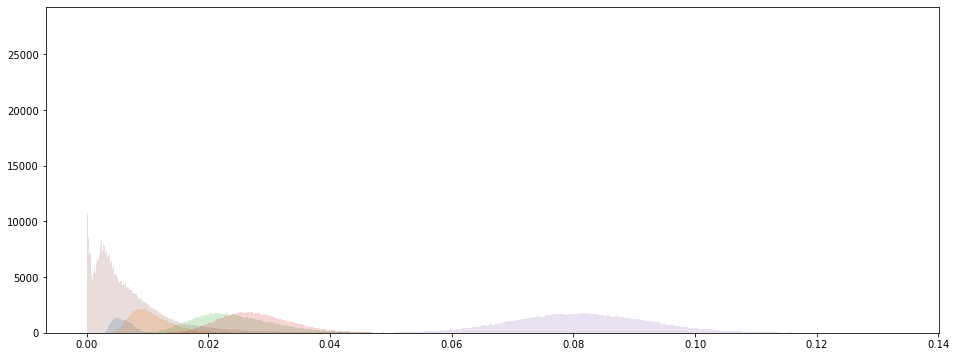

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,6))

for rug in rugs:
    plt.hist(rug,bins=200,alpha=0.2)
#plt.hist(random,bins=200)
plt.hist(gb12_rug,bins=1000,alpha=0.2)
plt.show()

In [5]:
#gb4 = Protein_Landscape(csv_path="~/PhD/Protein_Evolution/Datasets/GProtein/G_protein_4_mut_cleaned.csv",gen_graph=True)
gb12 = Protein_Landscape(csv_path="~/PhD/Protein_Evolution/Datasets/GProtein/Full_GProtein.csv",gen_graph=True)

Building Protein Graph for entire dataset


  3%|▎         | 13997/536962 [00:00<00:07, 72607.50it/s]

Calculating the number of extrema


100%|██████████| 536962/536962 [00:06<00:00, 86612.56it/s]



        Protein Landscape class
            Number of Sequences : 536962
            Max Distance        : 3
            Number of Distances : 3
            Seed Sequence       : MAYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE
                Modified positions are shown in green
            Number of minima : 1177
            Number of maxima : 1490
            Normalized Extrema Ruggedness : 0.004966831917342381
            R/S Ruggedness : 1.9277890715796737e-09
        


In [31]:
blac = Protein_Landscape(csv_path="~/PhD/Protein_Evolution/Datasets/BLactamase/Blac_EC50_Cleaned.csv",gen_graph=True)

Building Protein Graph for entire dataset


100%|██████████| 5230/5230 [00:00<00:00, 52772.63it/s]

Calculating the number of extrema

        Protein Landscape class
            Number of Sequences : 5230
            Max Distance        : 2
            Number of Distances : 2
            Seed Sequence       : AFKLLSKLLVYLTASIMAIASPLAFSVDSSGEYPTVSEIPVGEVRLYQIADGVWSHIATQSFDGAVYPSNGLIVRDGDELLLIDTAWGAKNTAALLAEIEKQIGLPVTRAVSTHFHDDRVGGVDVLRAAGVATYASPSTRRLAEVEGNEIPTHSLEGLSSSGDAVRFGPVELFYPGAAHSTDNLIVYVPSASVLYGGCAIYELSRTSAGNVADADLAEWPTSIERIQQHYPEAQFVIPGHGLPGGLDLLKHTTNVVKAHTNRSVVE
                Modified positions are shown in green
            Number of minima : 161
            Number of maxima : 169
            Normalized Extrema Ruggedness : 0.06309751434034416
            R/S Ruggedness : 16.478461526004715
        


In [1]:
gb12 = Protein_Landscape(saved_file="~/PhD/Protein_Evolution/Datasets/GProtein/Full_GProtein.txt")

NameError: name 'Protein_Landscape' is not defined

In [9]:
gb12_rug = []
fitty = scaler.transform(gb12.fitnesses.reshape(-1,1))
for key in gb12.graph.keys():
    gb12_rug.append(np.var(fitty[gb12.graph[key]["neighbours"]]))

In [34]:
blackrug = []
blac_scaler = MinMaxScaler(feature_range=(0,1))
blac_scaler.fit(blac.fitnesses.reshape(-1,1))
blac_fitty = blac_scaler.transform(blac.fitnesses.reshape(-1,1))
for key in blac.graph.keys():
    blackrug.append(np.var(blac_fitty[blac.graph[key]["neighbours"]]))

In [ ]:
        big.graph[key]["local variance"] = np.var(big.fitnesses[big.graph[key]["neighbours"]])


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [8]:
scaler.fit(gb12.fitnesses.reshape(-1,1))

MinMaxScaler()

In [46]:
for rug in rugs:
    print(np.mean(rug),np.var(rug))
print()
print(np.mean(gb12_rug),np.var(gb12_rug))
print(np.mean(blackrug),np.var(blackrug))

0.005935995250016707 2.314160609091417e-06
0.01077337248833914 1.2552554433483275e-05
0.02448694814667563 4.57346874524477e-05
0.027917508097440782 3.5157574285470445e-05
0.08131125294302471 0.00012453642659500069

0.00693992008446153 5.305601401717801e-05
0.04627526956938187 0.001014674436995688


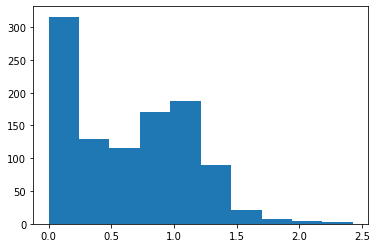

In [51]:
plt.hist(gb12.fitnesses[gb12.graph[1]["neighbours"]])
plt.show()